In [ ]:
from google.colab import drive
drive.mount('/gdrive')
%cd /gdrive

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).
/gdrive


In [ ]:
from pprint import pprint
# Import libraries, features and settings (not all of these are needed so pull what you need)

import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd
import io
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from sklearn import preprocessing
plt.rc("font", size = 14)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
sns.set(style="white")
sns.set(style="whitegrid", color_codes = True)

In [ ]:
df = pd.read_csv('/gdrive/MyDrive/Colab Notebooks/food_news_articles/df_data.csv', sep=',')

In [ ]:
df.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,corrupt government,economic impoverishment,unable to sow,cattle plague,air attack,gangs of bandits,inadequate rainfall,rinderpest,rising inflation,fews_ipc
0,0,0.523720,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.462010,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
colsAgriculture = ['bad harvests', 'drought', 'floods', 'lack of rains', 'pests', 'cyclone', 'locusts', 'natural disaster', 'farmland', 'unable to sow', 'cattle plague',
                   'inadequate rainfall', 'rinderpest']
colsClimateChange = ['carbon', 'catastrophe', 'climate change', 'climatic hazards', 'environmental degradation', 'greenhouse gases', 'land degradation',
                     'weather extremes']
colsFoodPrice = ['price of food', 'rise', 'rising food prices', 'price rise', 'rising inflation']
colsSocEco = ['cycle of poverty', 'economic crisis', 'food assistance', 'food crisis', 'food insecurity', 'humanitarian situation', 
              'infant mortality', 'malnourished', 'acute hunger', 'ecological crisis', 'hunger crises', 'makeshift camps', 'reduced imports',
              'foreign aid', 'international intervention', 'without international aid', 'economic impoverishment']
colsMigration = ['displaced', 'flee', 'migration', 'refugees', 'brain drain', 'asylum seekers']
colsPolitical = ['authoritarian', 'conflict', 'corruption', 'coup', "d'etat", 'dictators', 'jihadist groups', 'land grab', 'land reform', 'lack of authority',
                 'mismanagement', 'overthrow', 'repression', 'secession', 'siege', 'terrorism', 'terrorist', 'the offensive', 'aid appeal', 'blockade',
                 'convoys', 'human rights abuses', 'humanitarian disaster', 'military junta', 'civil strife', 'militia groups', 'apathy', 'bombing campaign',
                 'call for donations', 'foreign troops', 'oppressive regimes', 'totalitarian', 'military dictatorship', 'stolen food aid', 'corrupt government',
                 'air attack', 'burning houses', 'lack of roads', 'wreaked havoc', ]
colsCrime = ['clans', 'looting', 'pirates', 'mayhem', 'warlord', 'gangs of bandits', 'slave trade']
colsHealth = ['epidemics', 'cholera outbreak', 'gastrointestinal', 'water availability', 'dehydrated']

colsUnsure = ['dysfunction', 'tragedy', 'alarming level']

In [ ]:
df['Agriculture'] = df[colsAgriculture].sum(axis=1)
df['ClimateChange'] = df[colsClimateChange].sum(axis=1)
df['FoodPrice'] = df[colsFoodPrice].sum(axis=1)
df['SocioEconomic'] = df[colsSocEco].sum(axis=1)
df['Migration']= df[colsMigration].sum(axis=1)
df['Political'] = df[colsPolitical].sum(axis=1)
df['Health'] = df[colsHealth].sum(axis=1)
df['Crime'] = df[colsCrime].sum(axis=1)

In [ ]:
df.head(10)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,rising inflation,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
0,0,0.523720,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.462010,15.0,...,0.0,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,0.0,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,0.0,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,0.0,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,0.0,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0
5,5,1.377125,Burkina Faso,2017-02-01,-1.144652,2377.727451,-58.862745,2250.622549,-101.275899,9.0,...,0.0,1.0,9.0,30.0,7.0,6.0,9.0,31.0,0.0,0.0
6,6,27.475518,Guinea,2017-02-01,10.729071,4313.959770,-40.782687,5103.910201,127.207714,9.0,...,0.0,1.0,0.0,1.0,0.0,2.0,1.0,12.0,0.0,0.0
7,7,1.013336,Mali,2017-02-01,-0.208743,2188.009454,-36.587535,11152.840861,-477.693934,32.0,...,0.0,1.0,53.0,60.0,55.0,62.0,104.0,530.0,2.0,14.0
8,8,0.308902,Niger,2017-02-01,-0.006661,1732.456863,7.250163,17028.255882,482.156781,4.0,...,0.0,2.0,1.0,1.0,2.0,0.0,1.0,37.0,0.0,1.0
9,9,0.452823,Senegal,2017-02-01,-0.003582,2154.160494,-31.318750,5438.573045,-225.218793,6.0,...,0.0,1.0,9.0,16.0,21.0,16.0,35.0,99.0,0.0,4.0


In [ ]:
newDf = df.transpose()
colsToDrop = colsAgriculture + colsClimateChange + colsFoodPrice + colsSocEco + colsMigration + colsPolitical + colsCrime + colsHealth + colsUnsure
newDf = newDf.drop(index = colsToDrop)
newDf = newDf.transpose()
newDf.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,pasture,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
0,0,0.52372,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,...,1055.933333,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,3380.15015,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,1031.317227,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,587.654902,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,1099.759259,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0


In [ ]:
len(newDf)

228

In [ ]:
def getScore(ipc):
  if(ipc <= 2):
    return 0
  else:
    return 1

newDf['highIPC'] = newDf.apply(lambda row : getScore(row['fews_ipc']), axis = 1)
newDf.head(5)

,Unnamed: 0,rain_mean,country,year_month,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,...,fews_ipc,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime,highIPC
0,0,0.52372,Burkina Faso,2017-01-01,0.007474,2600.760784,25.930719,1740.802941,-480.46201,15.0,...,1.0,22.0,15.0,8.0,25.0,9.0,64.0,1.0,0.0,0
1,1,3.816683,Guinea,2017-01-01,0.105602,4656.306916,64.388141,4111.143678,-325.993852,3.0,...,2.0,1.0,5.0,1.0,0.0,1.0,7.0,0.0,2.0,0
2,2,0.464684,Mali,2017-01-01,-0.063634,2369.657563,3.542454,10468.594013,-870.358543,32.0,...,1.0,21.0,45.0,49.0,40.0,113.0,524.0,0.0,39.0,0
3,3,0.079214,Niger,2017-01-01,-0.002052,1869.205882,51.479739,14171.061765,-1416.036589,4.0,...,2.0,0.0,1.0,0.0,3.0,3.0,18.0,0.0,0.0,0
4,4,0.463942,Senegal,2017-01-01,0.044821,2578.541152,61.775731,5819.014403,-701.915552,5.0,...,1.0,7.0,10.0,12.0,9.0,42.0,72.0,4.0,2.0,0


In [ ]:
# import important packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import pandas_profiling
from sklearn import metrics

from matplotlib import rcParams

**CODE ABOVE IS NOW SORTED AND READY TO BE FED INTO LOGIT MODEL** 

In [ ]:
!pip install shap
import shap 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


# Run first with only traditional features

In [ ]:
Xtrad = newDf.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country", "Agriculture", "ClimateChange", "FoodPrice", "SocioEconomic", "Migration", "Political", "Health", "Crime"], axis = 1)
ytrad = newDf["highIPC"]


X_train_trad, X_test_trad, y_train_trad, y_test_trad = train_test_split(Xtrad, ytrad, test_size=0.2)


In [ ]:
# Random Forest
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train_trad, y_train_trad)
random_forest_preds = random_forest.predict(X_test_trad)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_preds,y_test_trad))

The accuracy of the Random Forests model is :	 0.8695652173913043


In [ ]:
explainer = shap.TreeExplainer(random_forest)

In [ ]:
X_test_trad.iloc[[10]]

,rain_mean,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,acled_fatalities,fpi,area,cropland,population,ruggedness,pasture
119,0.534854,0.018609,2729.592157,154.762092,1838.947059,-382.317892,92.0,2.826087,4.108148,22.70596,0.29435,22801367.716652,0.236,1055.933333


In [ ]:
# Calculate Shap values
choosen_instance = X_test_trad.iloc[[10]]
shap_values = explainer.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer.expected_value[1], shap_values[1], choosen_instance)

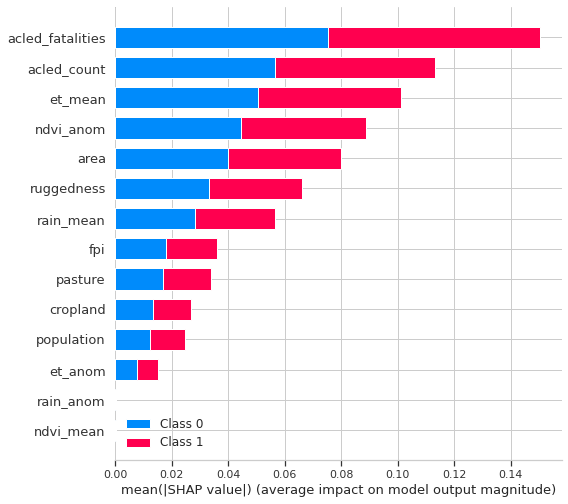

In [ ]:
shap.summary_plot(shap_values, X_train_trad)

In [ ]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

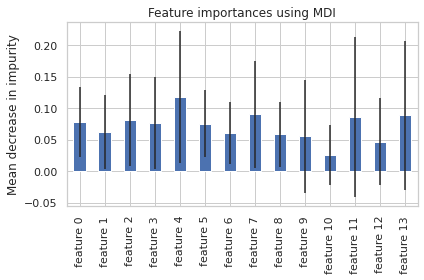

In [ ]:
feature_names = [f"feature {i}" for i in range(Xtrad.shape[1])]
forest_importances = pd.Series(importances, feature_names)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    random_forest, X_test_trad, y_test_trad, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances = pd.Series(result.importances_mean, index=feature_names)

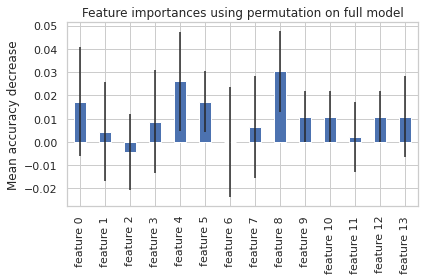

In [ ]:
fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=result.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()

# Repeat same process with text features added

In [ ]:
Xboth = newDf.drop(["highIPC", "fews_ipc", "Unnamed: 0", "year_month", "country"], axis = 1)
yboth = newDf["highIPC"]


X_train_both, X_test_both, y_train_both, y_test_both = train_test_split(Xboth, yboth, test_size=0.2)


In [ ]:
# Random Forest
random_forest_both = RandomForestClassifier(n_estimators=100)
random_forest_both.fit(X_train_both, y_train_both)
random_forest_both_preds = random_forest_both.predict(X_test_both)
print('The accuracy of the Random Forests model is :\t',metrics.accuracy_score(random_forest_both_preds,y_test_both))

The accuracy of the Random Forests model is :	 0.9347826086956522


In [ ]:
explainer_both = shap.TreeExplainer(random_forest_both)

In [ ]:
X_test_both.iloc[[10]]

,rain_mean,rain_anom,ndvi_mean,ndvi_anom,et_mean,et_anom,acled_count,acled_fatalities,fpi,area,...,ruggedness,pasture,Agriculture,ClimateChange,FoodPrice,SocioEconomic,Migration,Political,Health,Crime
218,187.012858,34.269505,5287.052941,-55.824434,18968.470588,5517.572075,80.0,1.875,4.078019,22.70596,...,0.236,1055.933333,15.0,9.0,3.0,14.0,18.0,34.0,1.0,2.0


In [ ]:
# Calculate Shap values
choosen_instance = X_test_both.iloc[[10]]
shap_values_both = explainer_both.shap_values(choosen_instance)
shap.initjs()
shap.force_plot(explainer_both.expected_value[1], shap_values_both[1], choosen_instance)

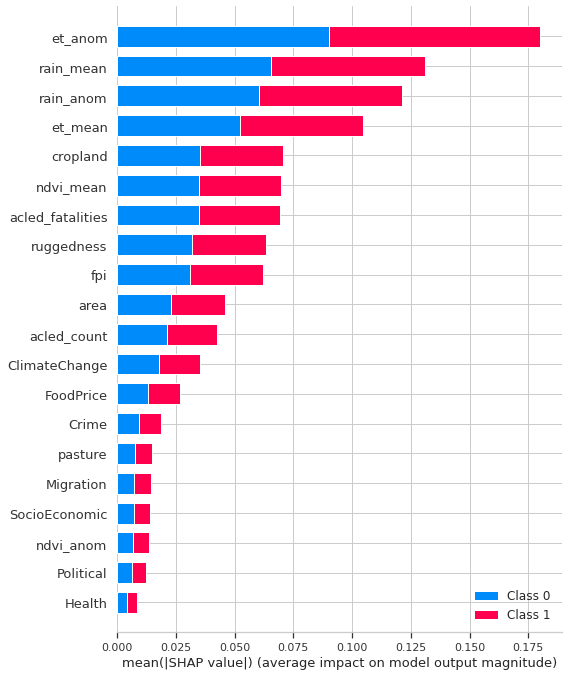

In [ ]:
shap.summary_plot(shap_values_both, X_train_both)

In [ ]:
importances_both = random_forest_both.feature_importances_
std_both = np.std([tree.feature_importances_ for tree in random_forest.estimators_], axis=0)

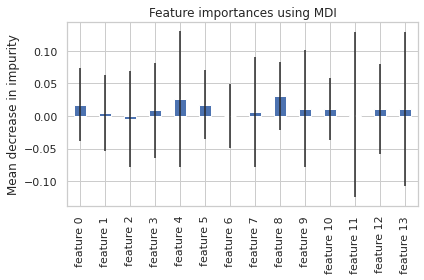

In [ ]:
feature_names_both = [f"feature {i}" for i in range(Xboth.shape[1])]
forest_importances_both = pd.Series(importances_both, feature_names_both)

fig, ax = plt.subplots()
forest_importances.plot.bar(yerr=std, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

In [ ]:
from sklearn.inspection import permutation_importance

result_both = permutation_importance(
    random_forest_both, X_test_both, y_test_both, n_repeats=10, random_state=42, n_jobs=2
)

forest_importances_both = pd.Series(result_both.importances_mean, index=feature_names_both)

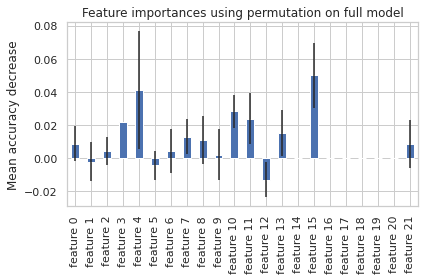

In [ ]:
fig, ax = plt.subplots()
forest_importances_both.plot.bar(yerr=result_both.importances_std, ax=ax)
ax.set_title("Feature importances using permutation on full model")
ax.set_ylabel("Mean accuracy decrease")
fig.tight_layout()
plt.show()